#   Распознаем MNIST
https://youtu.be/oCXh_GFMmOE

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten

## Готовим данные

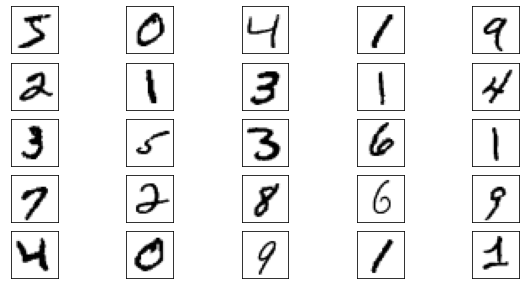

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# нормализация входных данных
x_train = x_train / 255
x_test = x_test / 255

# отображение первых 25 изображений из обучающей выборки
plt.figure(figsize=(10,5))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)

plt.show()

# преобразование выходных числовых значений в векторы по категориям
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

## Строим модель

In [1]:
# построение модели
model = keras.Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

print(model.summary())      # вывод структуры НС в консоль

# компиляция модели с выбранными параметрами оптимизации и функцией потерь
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

NameError: name 'keras' is not defined

## Обучаем модель

In [4]:
# обучение модели с разбивкой на обучающую и валидационную выборки
model.fit(x_train, y_train_cat, batch_size=32, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 1s 591us/step - loss: 0.4871 - accuracy: 0.8619 - val_loss: 0.1663 - val_accuracy: 0.9545
Epoch 2/5
1500/1500 [==============================] - 1s 442us/step - loss: 0.1352 - accuracy: 0.9614 - val_loss: 0.1228 - val_accuracy: 0.9629
Epoch 3/5
1500/1500 [==============================] - 1s 438us/step - loss: 0.0906 - accuracy: 0.9747 - val_loss: 0.1062 - val_accuracy: 0.9689
Epoch 4/5
1500/1500 [==============================] - 1s 440us/step - loss: 0.0653 - accuracy: 0.9804 - val_loss: 0.1000 - val_accuracy: 0.9702
Epoch 5/5
1500/1500 [==============================] - 1s 440us/step - loss: 0.0494 - accuracy: 0.9850 - val_loss: 0.0954 - val_accuracy: 0.9721


313/313 [==============================] - 0s 375us/step - loss: 0.0867 - accuracy: 0.9755
[[1.4893159e-07 3.9916376e-05 9.9983525e-01 1.8827310e-05 3.5045778e-14
  1.1747318e-05 2.4829558e-06 6.7213718e-14 9.1689151e-05 8.4729584e-12]]
2


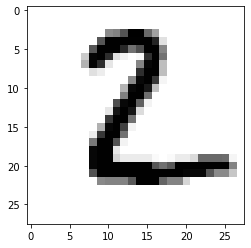

(10000,)
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
[ True  True  True  True  True  True  True  True  True  True]
(245, 28, 28)


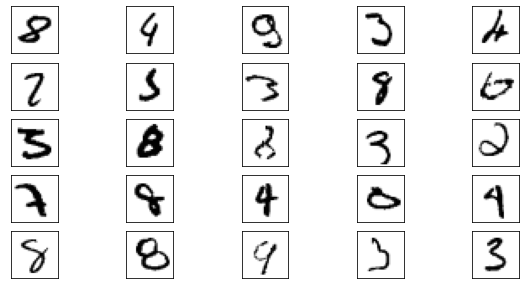

In [5]:
model.evaluate(x_test, y_test_cat)

n = 1
x = np.expand_dims(x_test[n], axis=0)
res = model.predict(x)
print( res )
print( np.argmax(res) )

plt.imshow(x_test[n], cmap=plt.cm.binary)
plt.show()

# Распознавание всей тестовой выборки
pred = model.predict(x_test)
pred = np.argmax(pred, axis=1)

print(pred.shape)

print(pred[:20])
print(y_test[:20])

# Выделение неверных вариантов
mask = pred == y_test
print(mask[:10])

x_false = x_test[~mask]
y_false = x_test[~mask]

print(x_false.shape)

# Вывод первых 25 неверных результатов
plt.figure(figsize=(10,5))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_false[i], cmap=plt.cm.binary)

plt.show()